In [1]:
from glob import glob
import sys
import os
# import psutil
from os.path import join, dirname
from os.path import getsize
import pickle
import numpy as np
import pandas as pd
import scipy.stats

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import statsmodels.stats.multitest
# from statsmodels.sandbox.stats.multicomp import multipletests

# import nilearn.masking
from nilearn import plotting as nplt
from nilearn import image as niimg
import nilearn.decoding

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GroupKFold
from sklearn.preprocessing import StandardScaler
# from sklearn.svm import LinearSVC

# import mydef as my Class correction for projects
import mydef

In [2]:
GA = mydef.GA()

In [3]:
from datetime import date
today = date.today().strftime("%Y%m%d")

In [4]:
## background image
img_bg = join(GA.dir_mask,'mni152_2009bet.nii.gz')

# ROI list

## Movement-related ROIs from localizer

In [5]:
## ROI
roi_imgs = {}
path_list = sorted(glob(join(GA.dir_mask,'localizer','n200_*.nii')))
for path in path_list:
    roi = path.split('/')[-1].replace('_mask.nii', '')
    roi_imgs[roi] = niimg.load_img(path)
roi_imgs

{'n200_c1-1_L_M1': <nibabel.nifti1.Nifti1Image at 0x7fe7d0106a90>,
 'n200_c1-2_L_S1': <nibabel.nifti1.Nifti1Image at 0x7fe7d0106be0>,
 'n200_c1_L_Postcentral': <nibabel.nifti1.Nifti1Image at 0x7fe7d1541a90>,
 'n200_c1_R_SPL': <nibabel.nifti1.Nifti1Image at 0x7fe7d1541e20>,
 'n200_c2_R_CerebellumIV-V': <nibabel.nifti1.Nifti1Image at 0x7fe7d154d970>,
 'n200_c2_R_MFG': <nibabel.nifti1.Nifti1Image at 0x7fe7d154dd60>,
 'n200_c3_R_MTG': <nibabel.nifti1.Nifti1Image at 0x7fe7d93bf430>,
 'n200_c3_R_Postcentral': <nibabel.nifti1.Nifti1Image at 0x7fe7d93bf490>,
 'n200_c4_L_IFG': <nibabel.nifti1.Nifti1Image at 0x7fe7d93bf850>,
 'n200_c4_L_Putamen': <nibabel.nifti1.Nifti1Image at 0x7fe7d93bfbb0>,
 'n200_c5_L_SPL': <nibabel.nifti1.Nifti1Image at 0x7fe7d93bfd30>,
 'n200_c5_R_SMA': <nibabel.nifti1.Nifti1Image at 0x7fe7d93c3310>,
 'n200_c6_R_CerebellumVIIIb': <nibabel.nifti1.Nifti1Image at 0x7fe7d93c3100>,
 'n200_c6_R_MFG': <nibabel.nifti1.Nifti1Image at 0x7fe7d93c3a30>,
 'n200_c7_L_Thalamus': <nibabel

In [6]:
key_list = ['n200_c1_L_Postcentral'
            , 'n200_c2_R_CerebellumIV-V'
            , 'n200_c3_R_Postcentral'
            , 'n200_c4_L_Putamen'
            , 'n200_c5_R_SMA'
            , 'n200_c6_R_CerebellumVIIIb'
            , 'n200_c7_L_Thalamus']
temp = {}
for key in key_list:
    temp[key] = roi_imgs[key]
roi_imgs = temp

n200_c1_L_Postcentral(n_voxles=200)
n200_c2_R_CerebellumIV-V(n_voxles=200)
n200_c3_R_Postcentral(n_voxles=200)
n200_c4_L_Putamen(n_voxles=200)
n200_c5_R_SMA(n_voxles=200)
n200_c6_R_CerebellumVIIIb(n_voxles=200)
n200_c7_L_Thalamus(n_voxles=200)


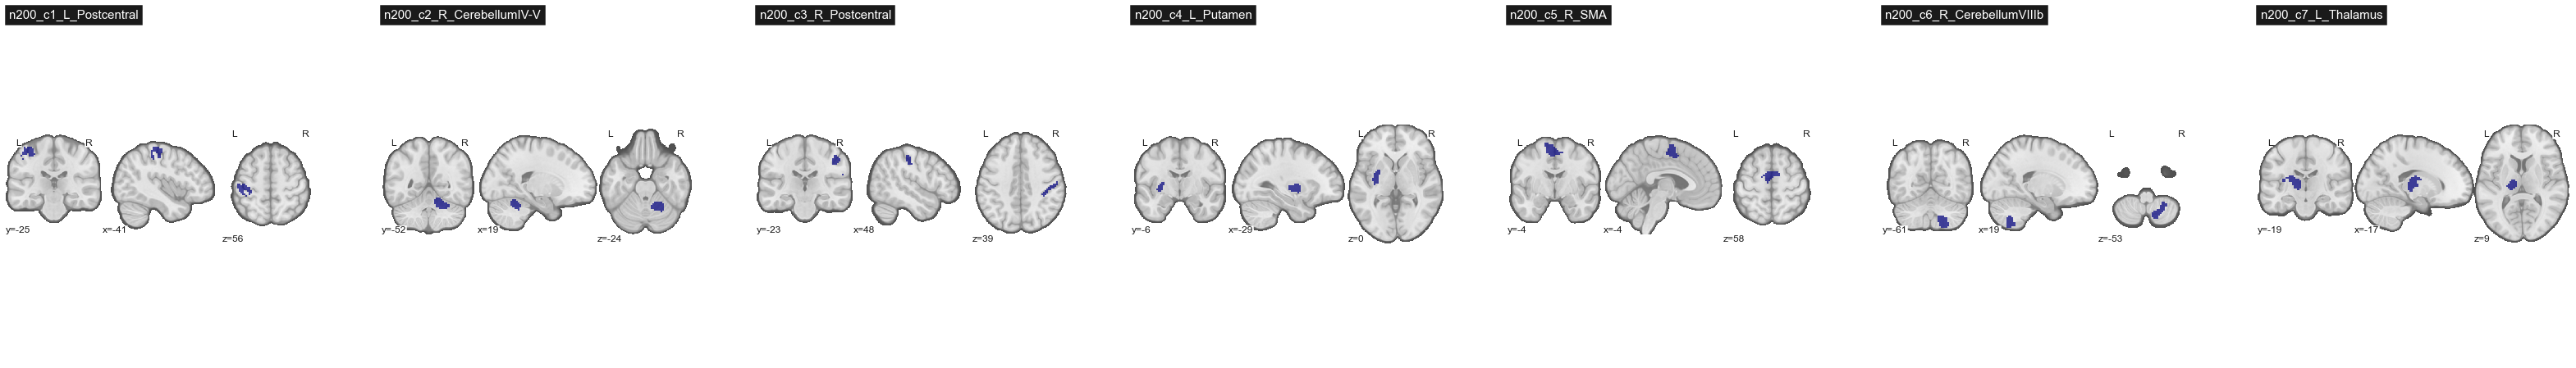

In [7]:
magn = 8   # a size of figures
ncol = 7   # a number of columns

nrow = len(key_list)//ncol   # a number of rows
_, axes = plt.subplots(nrow,ncol,figsize=(ncol*magn,nrow*magn))

for i, (key, img) in enumerate(roi_imgs.items()):
#     print(key, end='\r')
    print('%s(n_voxles=%d)'%(key,img.get_fdata().sum()))
    nplt.plot_roi(roi_img=img, bg_img=img_bg, title=key
                  , draw_cross=False, black_bg=False
                  , display_mode='ortho', axes=axes[i])

### The Classification Accuracies of the above ROIs

### *Calculation
*run once

In [7]:
# for subj in GA.list_subj:
for subj in ['01', '02']:
    betas = {}    ## memory reduction
    for stage in GA.list_stage:
        beta = GA.load_beta(subj, stage)
        betas[subj, stage] = beta[subj, stage]
    GA.cross_valid(betas, roi_imgs, GA.lda)

In [7]:
## save the result
pkl_name = '7localizers'
with open(join(GA.dir_script, today+'_%s.pkl'%pkl_name),"wb") as fw:
    pickle.dump(GA.scores, fw)

In [7]:
## compare by type
pkl_name = '7localizers'
temp = GA.show_pkl_list(GA.dir_script, pkl_name)
temp

,name,identity
0,20210426_7localizers.pkl,a


In [10]:
## load scores
with open(join(GA.dir_script,temp.loc[0,'name']),"rb") as fr:
    GA.scores = pickle.load(file=fr)

In [12]:
GA.make_wit_score()

,subj,ROI,visit,mapping,accuracy_1,accuracy_2,accuracy_3,mean_accuracy
0,01,n200_c1_L_Postcentral,early,practice,0.322917,0.427083,0.385417,0.378472
1,01,n200_c2_R_CerebellumIV-V,early,practice,0.239583,0.218750,0.322917,0.260417
2,01,n200_c3_R_Postcentral,early,practice,0.312500,0.291667,0.333333,0.312500
3,01,n200_c4_L_Putamen,early,practice,0.250000,0.322917,0.208333,0.260417
4,01,n200_c5_R_SMA,early,practice,0.333333,0.322917,0.354167,0.336806
...,...,...,...,...,...,...,...,...
835,44,n200_c3_R_Postcentral,late,unpractice,0.281250,0.322917,0.260417,0.288194
836,44,n200_c4_L_Putamen,late,unpractice,0.333333,0.322917,0.302083,0.319444
837,44,n200_c5_R_SMA,late,unpractice,0.312500,0.229167,0.208333,0.250000
838,44,n200_c6_R_CerebellumVIIIb,late,unpractice,0.343750,0.218750,0.270833,0.277778


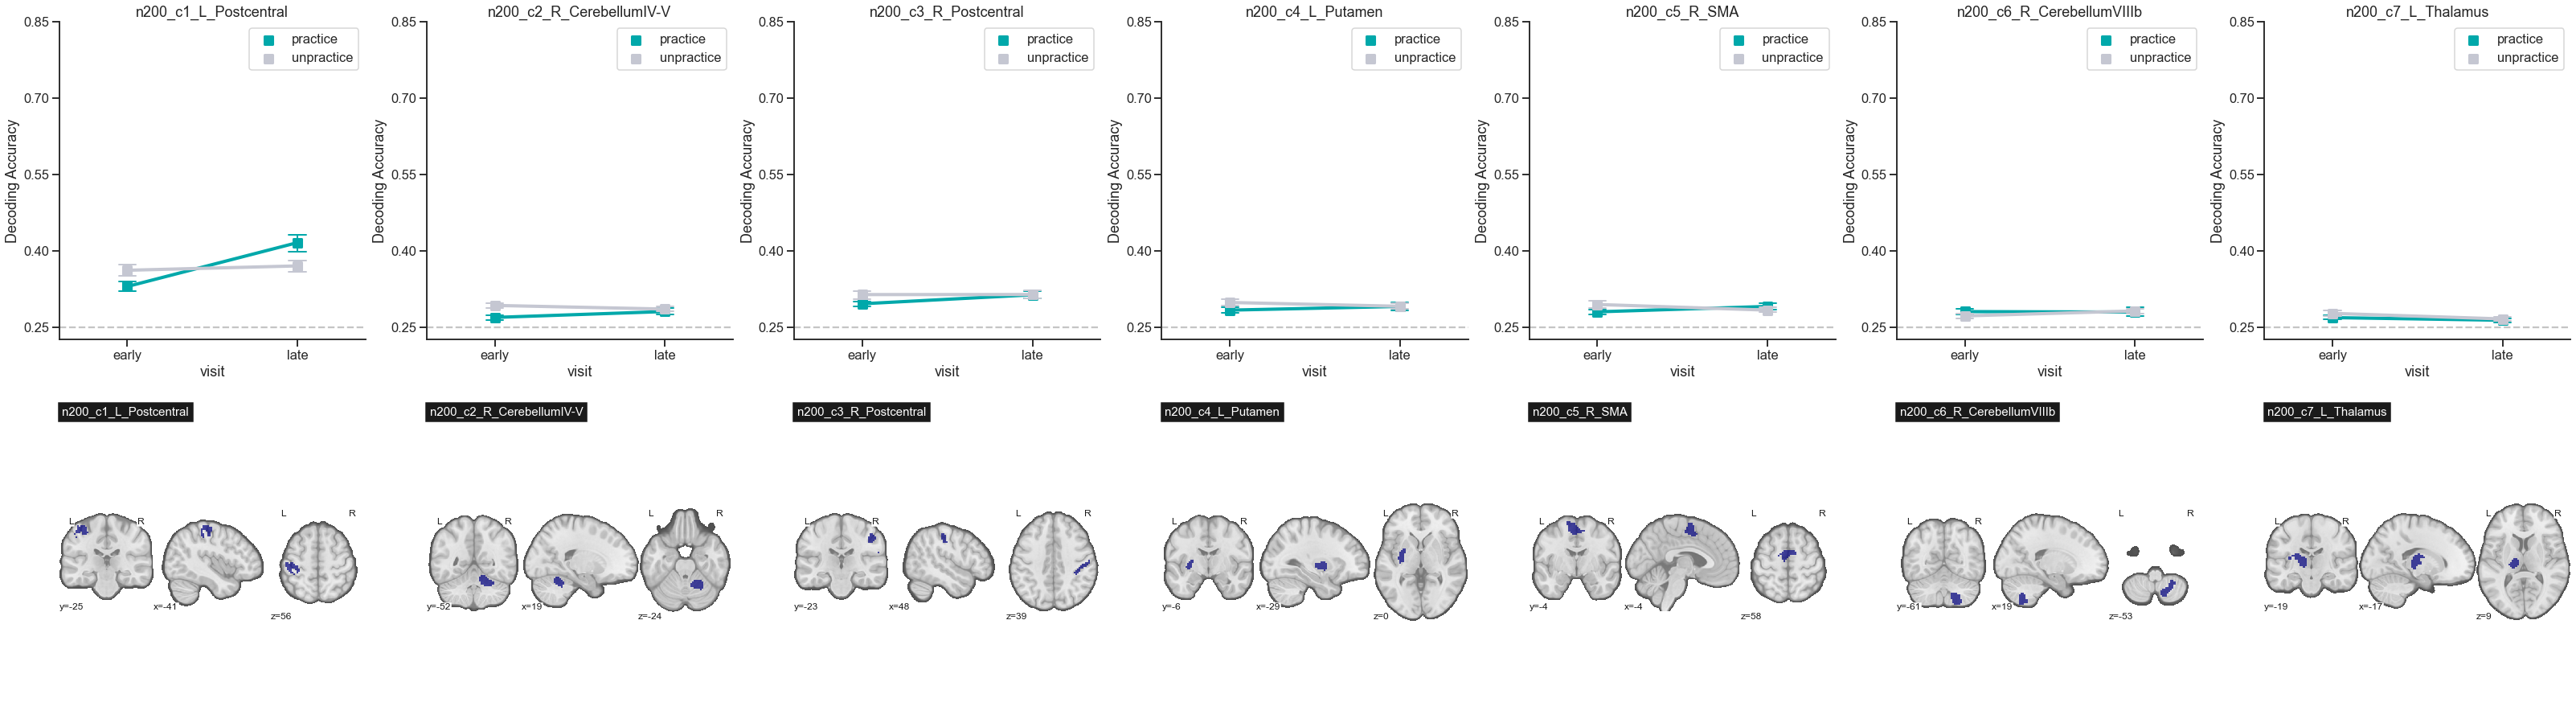

In [13]:
magn = 8   # a size of figures
ncol = 7   # a number of columns

nrow = 2*len(roi_imgs.keys())//ncol   # a number of rows
fig, axes = plt.subplots(nrow,ncol,figsize=(ncol*magn,nrow*magn))
for i, (key, img) in enumerate(roi_imgs.items()):
    print(key, end='\r')
    ax = GA.draw_lineplot(roi_name=key, title=key, ax=axes[2*(i//ncol),(i%ncol)])
    nplt.plot_roi(roi_img=img, bg_img=img_bg, title=key
                  , draw_cross=False, black_bg=False
                  , display_mode='ortho', axes=axes[2*(i//ncol)+1,(i%ncol)])

In [14]:
GA.do_paired_t_test('early_practice','late_practice')

{('n200_c1_L_Postcentral', 'early_practice/late_practice'): (array([ True]),
  array([8.27332221e-05])),
 ('n200_c2_R_CerebellumIV-V', 'early_practice/late_practice'): (array([False]),
  array([0.0722071])),
 ('n200_c3_R_Postcentral', 'early_practice/late_practice'): (array([False]),
  array([0.0639397])),
 ('n200_c4_L_Putamen', 'early_practice/late_practice'): (array([False]),
  array([0.39472756])),
 ('n200_c5_R_SMA', 'early_practice/late_practice'): (array([False]),
  array([0.1912762])),
 ('n200_c6_R_CerebellumVIIIb',
  'early_practice/late_practice'): (array([False]), array([0.92336231])),
 ('n200_c7_L_Thalamus', 'early_practice/late_practice'): (array([False]),
  array([0.41168924]))}

In [15]:
GA.make_wit_mean_ttest(stage='early_practice', mean=0.25)

,ROI,visit,mapping,tval,pval_uncorrected,reject,pval_corrected
0,n200_c1_L_Postcentral,early,practice,8.703611,1.394858e-09,True,1.394858e-09
1,n200_c2_R_CerebellumIV-V,early,practice,3.806147,6.754291e-04,True,6.754291e-04
2,n200_c3_R_Postcentral,early,practice,9.022293,6.455393e-10,True,6.455393e-10
3,n200_c4_L_Putamen,early,practice,6.371906,5.772277e-07,True,5.772277e-07
4,n200_c5_R_SMA,early,practice,5.639728,4.297449e-06,True,4.297449e-06
5,n200_c6_R_CerebellumVIIIb,early,practice,5.129903,1.767790e-05,True,1.767790e-05
6,n200_c7_L_Thalamus,early,practice,4.464133,1.121099e-04,True,1.121099e-04


## My replicated ROIs from localizers

In [9]:
## ROI
roi_imgs = {}
path_list = sorted(glob(join(GA.dir_stats,'GLM.move-stop','n*.nii.gz')))
for path in path_list:
    roi = path.split('/')[-1].replace('_mask.nii', '')
    roi_imgs[roi] = niimg.load_img(path)
roi_imgs

{'n200.L_Thalamus.nii.gz': <nibabel.nifti1.Nifti1Image at 0x7fed820ec6a0>,
 'n200.R_CerebellumVIIIb.nii.gz': <nibabel.nifti1.Nifti1Image at 0x7fed820eca60>,
 'n200.R_Postcentral.nii.gz': <nibabel.nifti1.Nifti1Image at 0x7fed820eceb0>,
 'n201.L_Postcentral.nii.gz': <nibabel.nifti1.Nifti1Image at 0x7fed820eb490>,
 'n202.R_CerebellumIV-V.nii.gz': <nibabel.nifti1.Nifti1Image at 0x7fed820eb520>,
 'n202.S_SMA.nii.gz': <nibabel.nifti1.Nifti1Image at 0x7fed820eb8b0>,
 'n225.L_Putamen.nii.gz': <nibabel.nifti1.Nifti1Image at 0x7fed820ebc40>}

n200.L_Thalamus.nii.gz(n_voxles=1400)
n200.R_CerebellumVIIIb.nii.gz(n_voxles=1200)
n200.R_Postcentral.nii.gz(n_voxles=600)
n201.L_Postcentral.nii.gz(n_voxles=201)
n202.R_CerebellumIV-V.nii.gz(n_voxles=404)
n202.S_SMA.nii.gz(n_voxles=1010)
n225.L_Putamen.nii.gz(n_voxles=900)


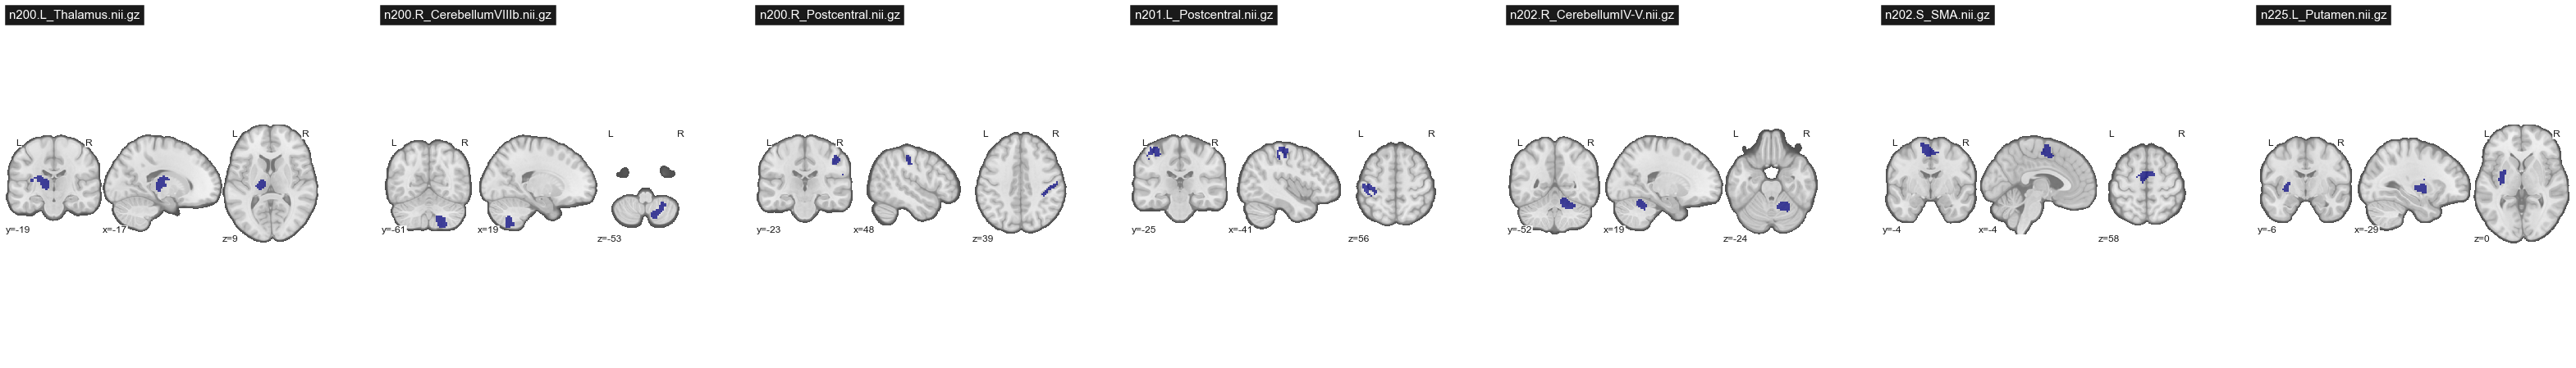

In [10]:
magn = 8   # a size of figures
ncol = 7   # a number of columns

nrow = len(key_list)//ncol   # a number of rows
_, axes = plt.subplots(nrow,ncol,figsize=(ncol*magn,nrow*magn))

for i, (key, img) in enumerate(roi_imgs.items()):
#     print(key, end='\r')
    print('%s(n_voxles=%d)'%(key,img.get_fdata().sum()))
    nplt.plot_roi(roi_img=img, bg_img=img_bg, title=key
                  , draw_cross=False, black_bg=False
                  , display_mode='ortho', axes=axes[i])

## Default Mode Network

In [11]:
roi_imgs = {}
roi_names = []

## DMN regions(global)
module_names = ['Core', 'dMsub', 'MTLsub']

for name in module_names:
    DMN_list = glob(join(GA.dir_dmn, name+'.nii'))
    for path in DMN_list:
        fname = path.split('/')[-1].replace('.nii', '')
        roi_imgs[fname] = nilearn.image.load_img(path)
        roi_names.append(fname)
        
# ## DMN regions(detail)
module_names = ['Core', 'dMsub', 'MTLsub']

for name in module_names:
    DMN_list = glob(join(GA.dir_dmn, name+'_*.nii'))
    for path in DMN_list:
        fname = path.split('/')[-1].replace('.nii', '')
        roi_imgs[fname] = nilearn.image.load_img(path)
        roi_names.append(fname)

roi_imgs

{'Core': <nibabel.nifti1.Nifti1Image at 0x7fed917cbaf0>,
 'dMsub': <nibabel.nifti1.Nifti1Image at 0x7fed723bb3d0>,
 'MTLsub': <nibabel.nifti1.Nifti1Image at 0x7fed723bb280>,
 'Core_PCC_l': <nibabel.nifti1.Nifti1Image at 0x7fed723bb640>,
 'Core_PCC_r': <nibabel.nifti1.Nifti1Image at 0x7fed723bba30>,
 'Core_aMPFC_l': <nibabel.nifti1.Nifti1Image at 0x7fed723bbe50>,
 'Core_aMPFC_r': <nibabel.nifti1.Nifti1Image at 0x7fed723bb4c0>,
 'dMsub_LTC_l': <nibabel.nifti1.Nifti1Image at 0x7fed723a6250>,
 'dMsub_LTC_r': <nibabel.nifti1.Nifti1Image at 0x7fed723a6610>,
 'dMsub_TPJ_l': <nibabel.nifti1.Nifti1Image at 0x7fed723a69d0>,
 'dMsub_TPJ_r': <nibabel.nifti1.Nifti1Image at 0x7fed723a6700>,
 'dMsub_TempP_l_temp': <nibabel.nifti1.Nifti1Image at 0x7fed72398190>,
 'dMsub_TempP_r_temp': <nibabel.nifti1.Nifti1Image at 0x7fed72398550>,
 'dMsub_dMPFC': <nibabel.nifti1.Nifti1Image at 0x7fed72398940>,
 'MTLsub_HF_l': <nibabel.nifti1.Nifti1Image at 0x7fed72398d30>,
 'MTLsub_HF_r': <nibabel.nifti1.Nifti1Image 

## Ventral visual stream (TT_Daemon, Brodmann Area)

In [12]:
roi_imgs = {}
path_list = glob(join(GA.dir_mask, 'TT_Daemon', '*.brik1.BA???.*.nii.gz'))
for path in path_list:
    temp = path.split('/')[-1].replace('.nii.gz', '')
    fname = temp.split('.')[2]
    roi_imgs[fname] = nilearn.image.load_img(path)
roi_imgs

{'BA17L': <nibabel.nifti1.Nifti1Image at 0x7fed917ce5e0>,
 'BA17R': <nibabel.nifti1.Nifti1Image at 0x7fed917a9670>,
 'BA18L': <nibabel.nifti1.Nifti1Image at 0x7fed917ce940>,
 'BA18R': <nibabel.nifti1.Nifti1Image at 0x7fed72398ee0>,
 'BA19L': <nibabel.nifti1.Nifti1Image at 0x7fed72395d90>,
 'BA19R': <nibabel.nifti1.Nifti1Image at 0x7fed72397c10>,
 'BA20L': <nibabel.nifti1.Nifti1Image at 0x7fed72397c70>,
 'BA20R': <nibabel.nifti1.Nifti1Image at 0x7fed723853a0>,
 'BA37L': <nibabel.nifti1.Nifti1Image at 0x7fed72385550>,
 'BA37R': <nibabel.nifti1.Nifti1Image at 0x7fed723858e0>,
 'BA38L': <nibabel.nifti1.Nifti1Image at 0x7fed72385c70>,
 'BA38R': <nibabel.nifti1.Nifti1Image at 0x7fed723850d0>}

## Fan280

In [14]:
fan_imgs={}
path_list = glob(join(GA.dir_mask,'fan280','*.nii.gz'))
for path in path_list:
    temp = path.split('/')[-1].replace('.nii.gz', '')
    fname = temp.split('.')[-1]
    fan_imgs[fname] = nilearn.image.load_img(path)